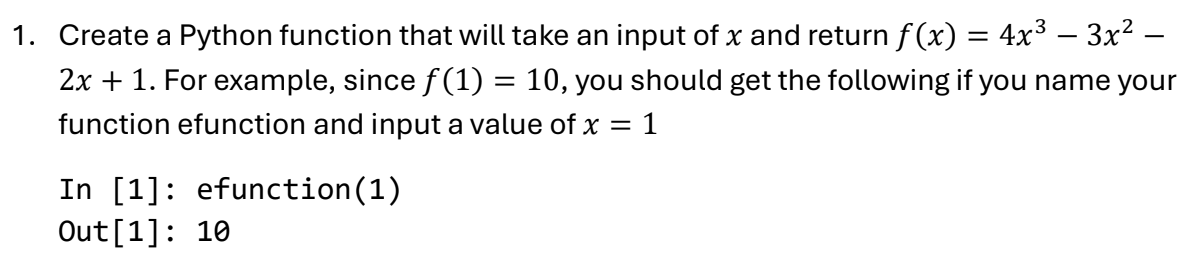

In [ ]:
def efunction(x):
    val = 4*pow(x,3)-3*pow(x,2)-2*x+1
    return val

def main():
    x = float(input("Enter the value of input x: "))
    print("In [{:.0f}]: {}".format(x, "efunction(1)"))

    val = efunction(x)
    print("Out [{:.0f}]: {:.0f}".format(x, val))

main()

In [1]: efunction(1)
Out [1]: 0


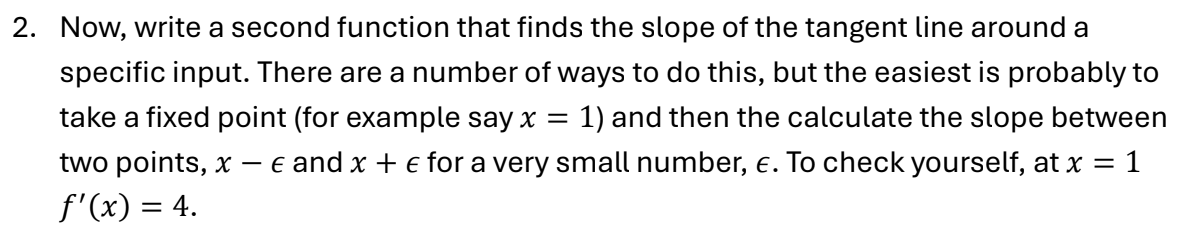

In [15]:
# slope of tangent = slope of secant (x-ε, f(x-ε)) and (x+ε, f(x+ε)) = derivative at that point.
def efunction(x):
    val = 4*pow(x,3)-3*pow(x,2)-2*x+1
    return val

def slope_fun(x1,y1, x2,y2):
    slope = (y2-y1)/(x2-x1)
    return slope

def derivative_fun(x):
    slope_val = 12*pow(x,2)-6*x-2
    return slope_val

def main():
    x = float(input("Enter the value of x: "))
    epsillon = 0.0000001

    x1 = x-epsillon
    y1 = efunction(x1)
    x2 = x+epsillon
    y2 = efunction(x2)

    slope = slope_fun(x1,y1, x2,y2)

    slope_derivative = derivative_fun(x)

    if (round(slope)==round(slope_derivative)):
        print("Hence proved, slope of the secant line: {} is same as tangent slope (calculated using derivative of fun): {:.2f}".format(slope, slope_derivative))
    else:
        print("Unable to prove...")

main()

Hence proved, slope of the secant line: 4.000000001110223 is same as tangent slope (calculated using derivative of fun): 4.00


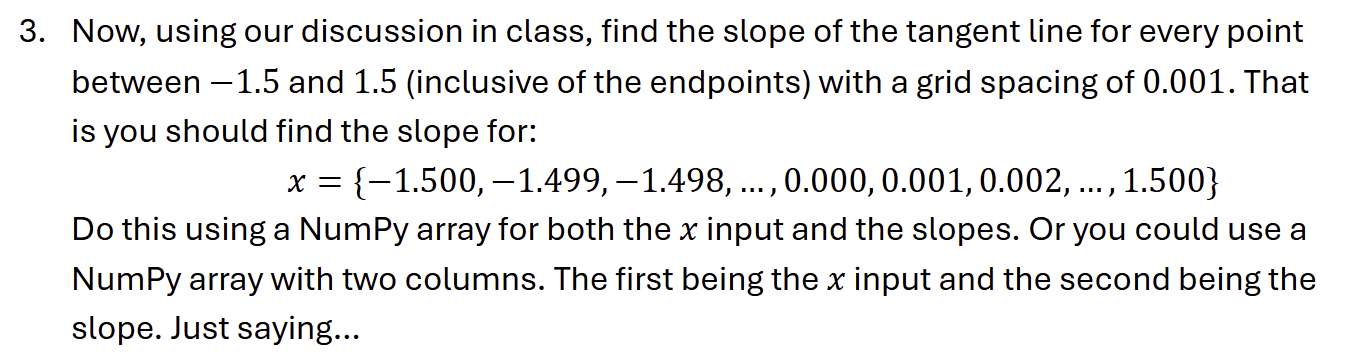

In [53]:
import numpy as np

def derivative_fun(x):
    slope_val = 12*pow(x,2)-6*x-2
    return slope_val

def fancy_print(data):
    print("   x     slope")
    print("-" * 15)
    # for i in range(len(data)): -- for the entire data printing
    for i in range(15):
        print("{:.3f}  {:.3f}".format(data[i,0], data[i,1]))

def main():
    x = np.arange(-1.500, 1.500 + 0.001, 0.001)
    
    slope = derivative_fun(x)

    data = np.column_stack((x, slope))

    fancy_print(data)

main()

   x     slope
---------------
-1.500  34.000
-1.499  33.958
-1.498  33.916
-1.497  33.874
-1.496  33.832
-1.495  33.790
-1.494  33.748
-1.493  33.707
-1.492  33.665
-1.491  33.623
-1.490  33.581
-1.489  33.539
-1.488  33.498
-1.487  33.456
-1.486  33.414


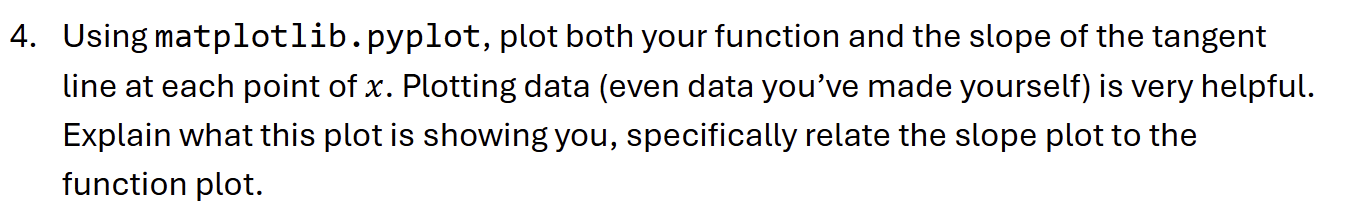

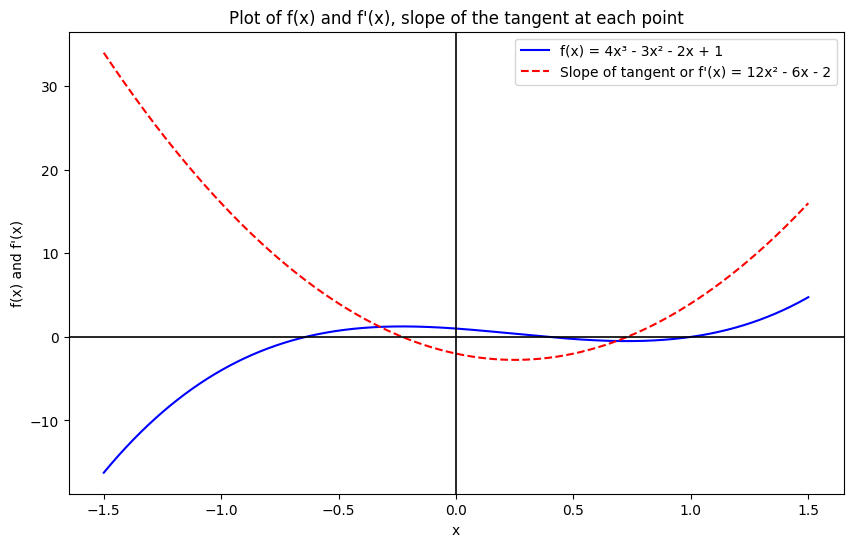

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def efunction(x):
    val = 4*pow(x,3)-3*pow(x,2)-2*x+1
    return val

def derivative_fun(x):
    slope_val = 12*pow(x,2)-6*x-2
    return slope_val

def main():
    x = np.arange(-1.5, 1.5 + 0.0001, 0.0001)
    y = efunction(x)
    slopes = derivative_fun(x)

    plt.figure(figsize=(10,6))
    # plt.ylim(-50, 100)   # manually set the range of y axis, for a zoomed out veiw

    plt.plot(x, y, label="f(x) = 4x³ - 3x² - 2x + 1", color="blue")
    plt.plot(x, slopes, label="Slope of tangent or f'(x) = 12x² - 6x - 2", color="red", linestyle="--")
    
    plt.axhline(0, color="black", linewidth=1.2)  # x-axis
    plt.axvline(0, color="black", linewidth=1.2)  # y-axis
    
    plt.legend() 
    plt.title("Plot of f(x) and f'(x), slope of the tangent at each point")
    plt.xlabel("x")
    plt.ylabel("f(x) and f'(x)")
    plt.show()
        

main()

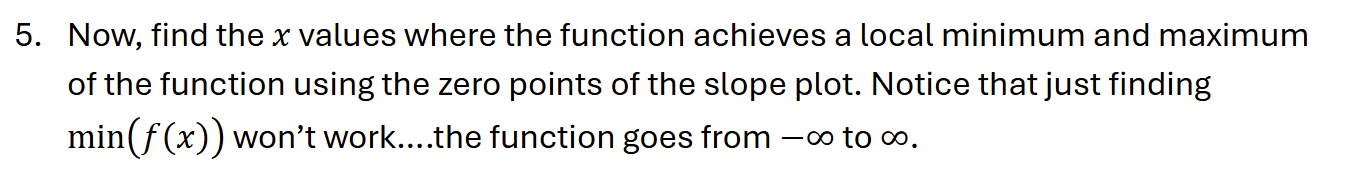

In [27]:
import numpy as np

def efunction(x):
    val = 4*pow(x,3) - 3*pow(x,2) - 2*x + 1
    return val

def derivative_fun_return_critical_point():
    # 12*pow(x,2) - 6*x - 2 = 0
    coeff = [12,-6,-2]
    critical_pts = np.roots(coeff)
    return critical_pts

def double_derivative(x, min_and_max):
    # double derivative is +ve = Concave up = Local Minima
    # double derivative is -ve = Concave down = Local Maxima
    val = 24*x - 6
    if (val>0):
        print("At the critical point {:.2f} the curve is Concave up that means, it's local minima.".format(x))
        print("The Minimmum value of the function f(x) is: {:.2f}".format(min_and_max))
    if (val<0):
        print("At the critical point {:.2f} the curve is Concave down that means, it's local maxima".format(x))
        print("The Maximum value of the function f(x) is: {:.2f}".format(min_and_max))


def main():
    critical_pts = derivative_fun_return_critical_point()
    min_and_max = []

    for i in range(len(critical_pts)):
        min_and_max.append(efunction(critical_pts[i]))

    for i in range(len(critical_pts)):
        double_derivative(critical_pts[i], min_and_max[i])

    
main()

At the critical point 0.73 the curve is Concave up that means, it's local minima.
The Minimmum value of the function f(x) is: -0.50
At the critical point -0.23 the curve is Concave down that means, it's local maxima
The Maximum value of the function f(x) is: 1.25


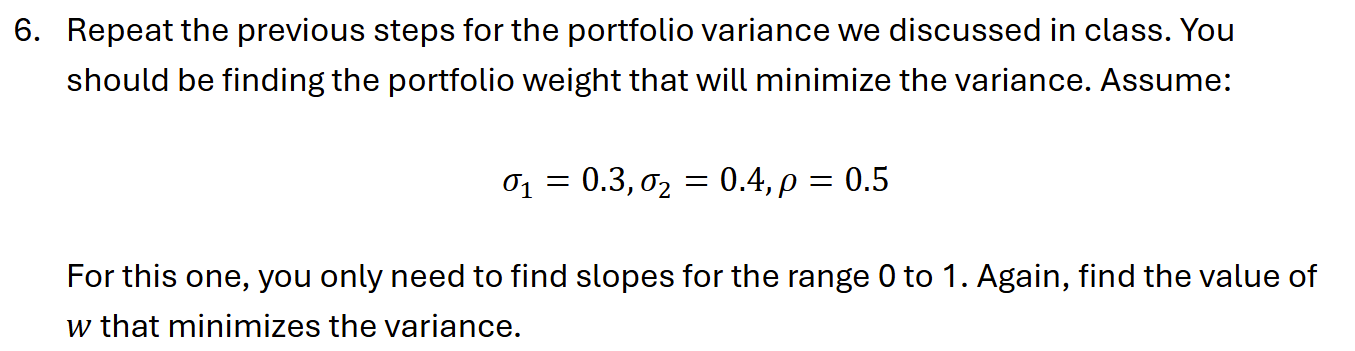

In [ ]:
# Portfolio variance = w^2 * σ1^2 + (1-w)^2 * σ2^2 + 2*w*(1-w)*ρ*σ1*σ2
# To minimize, derivative wrt w = 0

import numpy as np

def slope_to_check_min_wgt(sigma1, sigma2, rho, w):
    cov = rho * sigma1 * sigma2
    derivative = 2*w*sigma1**2 - 2*(1-w)*sigma2**2 + 2*(1-2*w)*cov
    return derivative


def find_min_weight(sigma1, sigma2, rho):
    cov = rho * sigma1 * sigma2

    # w = (σ2^2 - ρ*σ1*σ2) / (σ1^2 + σ2^2 - 2*ρ*σ1*σ2)
    
    numer = sigma2**2 - cov
    denom = sigma1**2 + sigma2**2 - 2*cov
    
    w_optimal = numer / denom
    
    return w_optimal

def main():
    # Given values
    sigma1 = 0.3
    sigma2 = 0.4
    rho = 0.5

    # Find optimal weight
    w_optimal = find_min_weight(sigma1, sigma2, rho)

    print("Minimum portfolio weight w = {:.3f}".format(w_optimal))

    w_values = np.arange(0, 1.001, 0.001)  # 0 to 1 with step 0.001
    slopes = []
    variances = []

    for w in w_values:
        slope = slope_to_check_min_wgt(sigma1, sigma2, rho, w)
        slopes.append(slope)

    slopes = np.array(slopes)

    min_slope_idx = np.argmin(np.abs(slopes))
    w_min_from_slopes = w_values[min_slope_idx]

    print("From slope analysis:")
    print("w that minimizes variance, calculated using derivative = {:.3f}".format(w_min_from_slopes))
    print("Slope at this point = {:.8f}".format(slopes[min_slope_idx]))

main()

Minimum portfolio weight w = 0.769
From slope analysis:
w that minimizes variance, calculated using derivative = 0.769
Slope at this point = -0.00006000
